# PANDAS AVANÇADO
---

# CARREGANDO OS DADOS
---

## Configurações do projeto

### Importando pacotes

In [ ]:
import pandas as pd

In [ ]:
pd.__version__

'1.1.5'

### Opções de configuração

[Documentação](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)

In [ ]:
pd.get_option("display.max_rows")

60

In [ ]:
pd.get_option("display.max_columns")

0

[Opções disponíveis](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#available-options)

In [ ]:
import numpy as np

In [ ]:
np.arange(10000).reshape(100, 100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

## Carregando os dados

### Arquivos JSON - `read_json`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html)

## JSON

JSON (**J**ava**S**cript **O**bject **N**otation - Notação de Objetos JavaScript) é uma formatação leve de troca de dados. Para seres humanos, é fácil de ler e escrever. Para máquinas, é fácil de interpretar e gerar. Está baseado em um subconjunto da linguagem de programação JavaScript, Standard ECMA-262 3a Edição - Dezembro - 1999. JSON é em formato texto e completamente independente de linguagem, pois usa convenções que são familiares às linguagens C e familiares, incluindo C++, C#, Java, JavaScript, Perl, Python e muitas outras. Estas propriedades fazem com que JSON seja um formato ideal de troca de dados.

[fonte](https://www.json.org/json-pt.html)

[Online JSON Viewer](http://jsonviewer.stack.hu/)

In [ ]:
#Como já sabido podemos pegar dados através de APIS que vem em formato JSON, podemos tratar elas com o pandas para poder definir os dados. 
# Vamos exempleficar criando um jason e transformando em data frame.
data_json = '{"A": [1, 2, 3, 4], "B": [5, 6, 7, 8], "C": [9, 10, 11, 12]}'
data_json

'{"A": [1, 2, 3, 4], "B": [5, 6, 7, 8], "C": [9, 10, 11, 12]}'

In [ ]:
#criado o jason vamos mostrar configurações de leitura.
#exemplificamos o orient do index, porém o default e por colunas.
#lembre que sempre devemos observar os dados para saber como organinar
dados = pd.read_json(
    path_or_buf=data_json,
    orient='index'
)
dados

,0,1,2,3
A,1,2,3,4
B,5,6,7,8
C,9,10,11,12


In [ ]:
dados = pd.read_json(
    path_or_buf=data_json,
    orient='columns'
)
dados

,A,B,C
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12


In [ ]:
#agora vamos usar um arquivo externo para ler o jason.
dados = pd.read_json(
    path_or_buf='realestates.json',
    orient='columns'
)
dados

,normal,highlights
output,{'listings': [{'imovel': {'tipos': {'proprieda...,{'listings': [{'imovel': {'tipos': {'proprieda...


### Arquivos EXCEL - `read_excel`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

In [ ]:
#Neste exemplos vamos importar um excel, é importante dizer que deve-se analisar o arquivo, se tem uma ou mais planilhas etc.
#na linha sheet_name vemos justamente qual aba de planilha vamos usar.
#usecols especificamos qual as colunas estão preenchidas com dados que queremos utilizar.
#na header seria a linha em que começa, respeitando a indexição de começo 0.
#index_col vai ser quais colunas vamos usar de index para o dataframe, ou seja a coluna 0 e 1.
#e depois em names os nomes das colunas.
#Note que este arquivo será multi-index, por isso usamos o 0 e 1 como index.
bairros = pd.read_excel(
    io = "bairros.xlsx",
    sheet_name="Preço médio por tipo",
    usecols="C:E",
    header = 2,
    index_col = [0, 1],
    names = ['bairros', 'tipo', 'valor_m2_bairo']
)
bairros
#skiprows e nrows:
# Exercicico: Observe que neste exemplo deixamos o parâmetro header com a configuração default (0) e utilizamos os parâmetros 
# skiprows=18 e nrows=17. Lembrando que skiprows informa o “índice” da linha em que o corte será realizado e esta indexação tem início no valor 0, 
# ou seja, skiprows=18 representa que o método read_excel() deve ignorar as dezenove primeiras linhas da planilha. Já nrows=17 informa o número de linhas,
# a partir do corte, que devem ser consideradas.

valor_m2_bairo
bairros       tipo                            
São Cristóvão Casa                       13793
              Apartamento                 6306
              Cobertura                  11695
              Consultório                 6991
              Imóvel Comercial           19633
...                                        ...
Vista Alegre  Cobertura                  16567
              Consultório                 5812
              Imóvel Comercial           12895
              Loja                        6182
              Sala Comercial              3377

[1127 rows x 1 columns]

# TRANSFORMANDO E TRATANDO OS DADOS
---

## Transformando dados no formato JSON para uma tabela

In [ ]:
dados = pd.read_json(
    path_or_buf='realestates.json',
    orient='columns'
)
dados

,normal,highlights
output,{'listings': [{'imovel': {'tipos': {'proprieda...,{'listings': [{'imovel': {'tipos': {'proprieda...


### `json_normalize`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html)

In [ ]:
#o json_normalize identifica que dentro de uma celula tem um arquivo json
#ele expande isso e pega as chaves transformando em colunas se continuar sendo json ele vai trabalhando.
#supondo que ele encontre uma variável final, uma lista, num string, ele para de navegar no json e finaliza a coluna.
dados_normal = pd.json_normalize(data=dados.normal)
dados_normal

,listings
0,"[{'imovel': {'tipos': {'propriedade': 'Casa'},..."


In [ ]:
dados_normal['listings'].iloc[0]

[{'anuncio': {'descricao': 'Amplo imóvel para venda com 3 quartos, sendo 1 suítes, e 2 banheiros no total.',
   'tipos': {'listagem': 'Lançamento', 'publicacao': 'Padrão'},
   'valores': {'aluguel': 0.0,
    'condominio': 790.0,
    'iptu': 5700.0,
    'venda': 2400000.0}},
  'imovel': {'area': 279,
   'caracteristicas': {'condominio': "['Churrasqueira', 'Salão de Jogos', 'Sauna', 'Estacionamento Visitantes', 'Playground', 'Salão de Festas', 'Porteiro 24 Horas', 'Estacionamento Coberto', 'Aceita Pet', 'Sistema de Incêndio', 'Segurança Interna', 'Bicicletário', 'Acessibilidade']",
    'entorno': "['Próximo a Escola Particular', 'Próximo ao Metrô', 'Próximo a Serviços de Saúde', 'Próximo a Centro Empresarial', 'Próximo a Restaurante', 'Próximo a Academia', 'Próximo a Praia', 'Próximo a Escola Pública', 'Próximo a Farmácia', 'Próximo a Parques e Áreas Verdes', 'Próximo ao Shopping', 'Próximo a Áreas de Lazer', 'Próximo a Mercado', 'Próximo a Comércio Diversos']",
    'propriedade': "['Áre

In [ ]:
type(dados_normal['listings'].iloc[0])

list

In [ ]:
len(dados_normal['listings'].iloc[0])

50

In [ ]:
#Aqui varremos o json utilizando o parametro dado normal que estava la e depois pegamos os listings.
#É importante sempre observar como estão os dados e como devemos tratalos para moldar.
#Podemos definir qual o tipo de separação e tbm até que level ele vai pegar as informações como max_level.
dados_normal_listings = pd.json_normalize(data=dados_normal['listings'].iloc[0], sep='_', max_level=2)
dados_normal_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,"{'type': 'Point', 'coordinates': [-43.3039086,...",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,"{'type': 'Point', 'coordinates': [0, 0]}",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,"{'type': 'Point', 'coordinates': [-43.3037186,...",2,380,"['Acessibilidade', 'Área de Serviço', 'Sauna',...","['Sauna', 'Playground', 'Quadra Poliesportiva'...",['Próximo a Escola Particular'],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,"{'type': 'Point', 'coordinates': [-43.3548121,...",1,73,"['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...","['Quadra Poliesportiva', 'Aceita Pet', 'Playgr...","['Próximo a Farmácia', 'Próximo a Academia', '...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,"{'type': 'Point', 'coordinates': [-43.1779703,...",1,32,['Armários Planejados'],"['Quadra Poliesportiva', 'Porteiro 24 Horas', ...","['Próximo a Centro Empresarial', 'Próximo a Ár...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
5,Casa,Vila Isabel,"{'type': 'Point', 'coordinates': [0, 0]}",2,164,"['Mobiliado', 'Varanda', 'Closet', 'Churrasque...","['Aceita Pet', 'Quadra Poliesportiva', 'Playgr...","['Próximo a Centro Empresarial', 'Próximo a Es...",Padrão,Lançamento,280000.0,0.0,583.0,188.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
6,Casa,Andaraí,"{'type': 'Point', 'coordinates': [-43.25220118...",1,68,"['Churrasqueira', 'Gás Encanado', 'Cozinha Ame...","['Sauna', 'Sistema de Incêndio', 'Estacionamen...","['Próximo ao Metrô', 'Próximo ao Shopping', 'P...",Destaque,Usado,300000.0,0.0,350.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
7,Apartamento,Copacabana,"{'type': 'Point', 'coordinates': [-43.1749613,...",1,110,"['Quarto/WC Empregada', 'Gás Encanado', 'Sauna...","['Piscina', 'Comércio/Serviços no Condomínio',...","['Próximo a Escola Particular', 'Próximo a Com...",Premium,Usado,950000.0,0.0,800.0,120.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
8,Consultório,Recreio dos Bandeirantes,"{'type': 'Point', 'coordinates': [-43.453754, ...",4,214,"['Acessibilidade', 'Mobiliado', 'Churrasqueira...","['Aceita Pet', 'Salão de Festas', 'Sauna', 'De...","['Próximo a Mercado', 'Próximo a Farmácia']",Super Destaque,Usado,1390000.0,0.0,750.0,3282.0,"Amplo imóvel para venda com 4 quartos, sendo 1..."
9,Casa,Recreio dos Bandeirantes,"{'type': 'Point', 'coordinates': [-43.5129166,...",1,82,"['Área de Serviço', 'Terraço', 'Ambientes Inte...","['Piscina', 'Salão de Festas', 'Estacionamento...","['Próximo ao Metrô', 'Próximo a Comércio Diver...",Padrão,Usado,439000.0,0.0,620.0,1.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [ ]:
#Porém podemos fazer a captura de informações mais diretas.
# Ao invés de utilizarmos o dados_normal para depois tratar o listings.
#Com o record_path ja especificamos onde será o recorte de caminho para criar igual foi mostrado acima.  
dados_normal_listings = pd.json_normalize(data=dados.normal, sep='_', record_path=['listings'])
dados_normal_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"['Acessibilidade', 'Área de Serviço', 'Sauna',...","['Sauna', 'Playground', 'Quadra Poliesportiva'...",['Próximo a Escola Particular'],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...","['Quadra Poliesportiva', 'Aceita Pet', 'Playgr...","['Próximo a Farmácia', 'Próximo a Academia', '...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,['Armários Planejados'],"['Quadra Poliesportiva', 'Porteiro 24 Horas', ...","['Próximo a Centro Empresarial', 'Próximo a Ár...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
5,Casa,Vila Isabel,Point,"[0, 0]",2,164,"['Mobiliado', 'Varanda', 'Closet', 'Churrasque...","['Aceita Pet', 'Quadra Poliesportiva', 'Playgr...","['Próximo a Centro Empresarial', 'Próximo a Es...",Padrão,Lançamento,280000.0,0.0,583.0,188.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
6,Casa,Andaraí,Point,"[-43.252201188, -22.9282608539]",1,68,"['Churrasqueira', 'Gás Encanado', 'Cozinha Ame...","['Sauna', 'Sistema de Incêndio', 'Estacionamen...","['Próximo ao Metrô', 'Próximo ao Shopping', 'P...",Destaque,Usado,300000.0,0.0,350.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
7,Apartamento,Copacabana,Point,"[-43.1749613, -22.964604]",1,110,"['Quarto/WC Empregada', 'Gás Encanado', 'Sauna...","['Piscina', 'Comércio/Serviços no Condomínio',...","['Próximo a Escola Particular', 'Próximo a Com...",Premium,Usado,950000.0,0.0,800.0,120.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
8,Consultório,Recreio dos Bandeirantes,Point,"[-43.453754, -23.0102127]",4,214,"['Acessibilidade', 'Mobiliado', 'Churrasqueira...","['Aceita Pet', 'Salão de Festas', 'Sauna', 'De...","['Próximo a Mercado', 'Próximo a Farmácia']",Super Destaque,Usado,1390000.0,0.0,750.0,3282.0,"Amplo imóvel para venda com 4 quartos, sendo 1..."
9,Casa,Recreio dos Bandeirantes,Point,"[-43.5129166, -23.0241139]",1,82,"['Área de Serviço', 'Terraço', 'Ambientes Inte...","['Piscina', 'Salão de Festas', 'Estacionamento...","['Próximo ao Metrô', 'Próximo a Comércio Diver...",Padrão,Usado,439000.0,0.0,620.0,1.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [ ]:
#Então podemos fazer o mesmo para Highlighits, elas tem a mesma formatação inclusive.
dados_highlights_listings = pd.json_normalize(data=dados.highlights, sep='_', record_path=['listings'])
dados_highlights_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Engenho Novo,Point,"[-43.2634918, -22.8971768]",0,0,"['Sauna', 'Terraço', 'Acessibilidade', 'Mobili...","['Estacionamento Coberto', 'Estacionamento Vis...","['Próximo a Serviços de Saúde', 'Próximo ao Sh...",Padrão,Usado,195772.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
1,Cobertura,Vargem Grande,Point,"[-43.4907917, -22.988122]",1,61,[],"['Estacionamento Visitantes', 'Estacionamento ...","['Próximo ao Metrô', 'Próximo a Praia', 'Próxi...",Destaque,Usado,305000.0,0.0,667.0,162.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Imóvel Comercial,Ribeira,Point,"[-43.1690005, -22.8239272]",4,180,"['Vista Panorâmica', 'Acessibilidade', 'Área d...","['Segurança Interna', 'Salão de Festas', 'Acad...","['Próximo a Restaurante', 'Próximo a Praia', '...",Padrão,Usado,1050000.0,0.0,0.0,315.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
3,Apartamento,Praça Seca,Point,"[0, 0]",1,50,"['Sauna', 'Quarto/WC Empregada']","['Salão de Jogos', 'Segurança Interna', 'Estac...","['Próximo ao Shopping', 'Próximo a Escola Part...",Padrão,Usado,250000.0,0.0,350.0,150.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
4,Apartamento,Honório Gurgel,Point,"[-43.3614243, -22.8416031]",0,148,"['Terraço', 'Piscina', 'Gás Encanado', 'Acessi...","['Sauna', 'Bicicletário', 'Academia', 'Serviço...","['Próximo a Serviços de Saúde', 'Próximo a Far...",Destaque,Lançamento,165000.0,0.0,270.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
5,Apartamento,Barra da Tijuca,Point,"[-43.3245375, -23.006984]",1,79,"['Terraço', 'Acessibilidade', 'Armários Planej...","['Salão de Festas', 'Estacionamento Visitantes...","['Próximo a Mercado', 'Próximo a Parques e Áre...",Premium,Usado,900000.0,0.0,1400.0,180.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
6,Consultório,Tijuca,Point,"[-43.2558939, -22.9444082]",1,126,"['Armários Planejados', 'Closet', 'Gás Encanad...","['Bicicletário', 'Salão de Jogos', 'Segurança ...","['Próximo a Praia', 'Próximo a Serviços de Saú...",Padrão,Usado,630000.0,0.0,0.0,1500.0,"Amplo imóvel para venda com 2 quartos, sendo 2..."
7,Apartamento,Recreio dos Bandeirantes,Point,"[-43.480981, -23.0160348]",1,126,"['Sauna', 'Cozinha Americana', 'Terraço', 'Gás...","['Estacionamento Visitantes', 'Salão de Festas...","['Próximo a Escola Pública', 'Próximo ao Metrô...",Padrão,Usado,475000.0,0.0,920.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
8,Apartamento,Tijuca,Point,"[-43.2266348, -22.9220052]",0,0,"['Ambientes Integrados', 'Varanda', 'Terraço',...","['Elevador', 'Acessibilidade', 'Estacionamento...",[],Padrão,Usado,0.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
9,Apartamento,Lagoa,Point,"[-43.2112318, -22.9625433]",1,56,"['Sauna', 'Piscina', 'Cozinha Americana', 'Vis...","['Quadra Poliesportiva', 'Bicicletário', 'Pisc...","['Próximo a Farmácia', 'Próximo a Áreas de Laz...",Padrão,Usado,1200000.0,0.0,1608.0,3284.0,"Amplo imóvel para venda com 1 quartos, sendo 1..."


In [ ]:
dados_normal_listings.head()

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"['Acessibilidade', 'Área de Serviço', 'Sauna',...","['Sauna', 'Playground', 'Quadra Poliesportiva'...",['Próximo a Escola Particular'],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...","['Quadra Poliesportiva', 'Aceita Pet', 'Playgr...","['Próximo a Farmácia', 'Próximo a Academia', '...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,['Armários Planejados'],"['Quadra Poliesportiva', 'Porteiro 24 Horas', ...","['Próximo a Centro Empresarial', 'Próximo a Ár...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."


In [ ]:
dados_highlights_listings.columns == dados_highlights_listings.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

## Trabalhando com dados textuais

### Transformando *strings* em listas do Python

In [ ]:
dados_normal_listings.head(2)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."


In [ ]:
#Ao se verificar o modo como está a primeira impressão é que temos uma lista dos dados que criamos a partir do json.
#Abaixo vamos criar uma variavel contendo uma parte do que foi especificado para testar.
lista_str = dados_normal_listings.loc[0,  'imovel_caracteristicas_propriedade']
lista_str

"['Área de Serviço', 'Terraço', 'Churrasqueira', 'Quarto/WC Empregada', 'Sauna', 'Varanda', 'Gás Encanado', 'Closet', 'Piscina', 'Mobiliado', 'Armários Planejados', 'Acessibilidade']"

In [ ]:
type(lista_str)#Ao executar vemos que o tipo está como string.
#supomos quse que se quisesse pegar área de serviço dentro de uma lista seria somente executar:
lista_str[0] #A sauda vai ser apenas '[', pois a primeira string na pos 0 é essa. Então vamos transformar estas informações em listas.


'['

#### Métodos de *strings*

[Documentação](https://docs.python.org/3.6/library/stdtypes.html#string-methods)

In [ ]:
#Agora vamos transformar as informações em listas.
#Dois exemplos abaixo de como eliminar informações dentro da variavel.
#Queremos eliminar as [] utilizamos e nos dois exemplos abaixo está demonstrando duas opções.
lista_str[1:-1]

"'Área de Serviço', 'Terraço', 'Churrasqueira', 'Quarto/WC Empregada', 'Sauna', 'Varanda', 'Gás Encanado', 'Closet', 'Piscina', 'Mobiliado', 'Armários Planejados', 'Acessibilidade'"

In [ ]:
lista_str.strip("[]")

"'Área de Serviço', 'Terraço', 'Churrasqueira', 'Quarto/WC Empregada', 'Sauna', 'Varanda', 'Gás Encanado', 'Closet', 'Piscina', 'Mobiliado', 'Armários Planejados', 'Acessibilidade'"

In [ ]:
#Agora vamos eliminar as aspas simples.

In [ ]:
lista_str[1:-1].replace("'", "")

'Área de Serviço, Terraço, Churrasqueira, Quarto/WC Empregada, Sauna, Varanda, Gás Encanado, Closet, Piscina, Mobiliado, Armários Planejados, Acessibilidade'

In [ ]:
#Agora vamos usar o split para toda vez que for encontrado um espaço ele criar uma lsita com esse item.

In [ ]:
lista = lista_str[1:-1].replace("'", "").split(", ")
lista

['Área de Serviço',
 'Terraço',
 'Churrasqueira',
 'Quarto/WC Empregada',
 'Sauna',
 'Varanda',
 'Gás Encanado',
 'Closet',
 'Piscina',
 'Mobiliado',
 'Armários Planejados',
 'Acessibilidade']

In [ ]:
type(lista) #agora vemos que para aquela informação exemplificada temos ela como lista

list

#### `str`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html)

#### `filter`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html)

In [ ]:
columns = dados_normal_listings.filter(like='imovel_caracteristicas').columns

for column in columns:
  dados_normal_listings[column] = dados_normal_listings[column].str[1:-1].str.replace("'", "").str.split(", ")
  dados_highlights_listings[column] = dados_highlights_listings[column].str[1:-1].str.replace("'", "").str.split(", ")

In [ ]:
dados_normal_listings.loc[0, 'imovel_caracteristicas_propriedade'][0]

'Área de Serviço'

In [ ]:
dados_tarefa = {
    "alunos": ["Rita", "Lucas", "Zeca", "Ana"], 
    "idade": [10, 12, 11, 10],
    "medidas_serie": [4, 5, 4, 5], 
    "medidas_altura": [1.3, 1.5, 1.45, 1.28], 
    "medidas_peso": [42, 50, 45, 38]
}

df = pd.DataFrame(dados_tarefa)

df.filter(like='medidas', axis='columns')


,medidas_serie,medidas_altura,medidas_peso
0,4,1.30,42
1,5,1.50,50
2,4,1.45,45
3,5,1.28,38


# COMBINANDO CONJUNTOS DE DADOS
---

## Empilhando *DataFrames*

### `append`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html)

In [ ]:
dados_normal_listings.append(dados_highlights_listings, ignore_index=True)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pisci...","[Elevador, Salão de Festas, Porteiro 24 Horas,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
67,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empreg...","[Bicicletário, Sistema de Incêndio, Segurança ...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
68,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Integ...","[Playground, Depósito Privativo, Academia, Qua...","[Próximo a Praia, Próximo a Serviços de Saúde,...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [ ]:
dados_listings = dados_normal_listings.append(dados_highlights_listings, ignore_index=True)

In [ ]:
dados_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pisci...","[Elevador, Salão de Festas, Porteiro 24 Horas,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
67,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empreg...","[Bicicletário, Sistema de Incêndio, Segurança ...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
68,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Integ...","[Playground, Depósito Privativo, Academia, Qua...","[Próximo a Praia, Próximo a Serviços de Saúde,...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


### `concat`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

## Combinando *DataFrames* a partir de uma chave de ligação

In [ ]:
dados_listings = pd.concat([dados_normal_listings, dados_highlights_listings], ignore_index=True)

In [ ]:
dados_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pisci...","[Elevador, Salão de Festas, Porteiro 24 Horas,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
67,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empreg...","[Bicicletário, Sistema de Incêndio, Segurança ...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
68,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Integ...","[Playground, Depósito Privativo, Academia, Qua...","[Próximo a Praia, Próximo a Serviços de Saúde,...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [ ]:
df_A = pd.DataFrame({'A': [1, 2, 3], "B": [1, 4, 9]})
df_B = pd.DataFrame({'A': [4, 5, 6], "B": [16, 25, 36]})
df_C = df_A.append(df_B, ignore_index=True)
df_C
df_D = pd.concat([df_A, df_B], ignore_index=True)
df_D

,A,B
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36


In [ ]:
df_A = pd.DataFrame({'A': [1, 2, 3], 'B': [1, 4, 9]})
df_B = pd.DataFrame({'B': [16, 25, 36], 'A': [4, 5, 6]})
df_C = df_B.append(df_A, ignore_index=True)
df_D = df_B.append(df_A, ignore_index=True, sort=True)
df_D

,A,B
0,4,16
1,5,25
2,6,36
3,1,1
4,2,4
5,3,9


In [ ]:
dados_listings.head(2)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."


In [ ]:
bairros

valor_m2_bairo
bairros       tipo                            
São Cristóvão Casa                       13793
              Apartamento                 6306
              Cobertura                  11695
              Consultório                 6991
              Imóvel Comercial           19633
...                                        ...
Vista Alegre  Cobertura                  16567
              Consultório                 5812
              Imóvel Comercial           12895
              Loja                        6182
              Sala Comercial              3377

[1127 rows x 1 columns]

### Tratando a variável de ligação

#### Selecionando a variável de ligação nos dois *DataFrames*

In [ ]:
bairros_amostra = dados_listings['imovel_endereco_bairro']
bairros_amostra

0     Barra da Tijuca
1        Campo Grande
2     Barra da Tijuca
3     Barra da Tijuca
4              Glória
           ...       
65         Copacabana
66             Leblon
67         Copacabana
68           Cachambi
69             Tijuca
Name: imovel_endereco_bairro, Length: 70, dtype: object

[Documentação: `get_level_values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.get_level_values.html)

In [ ]:
bairros_todos = bairros.index.get_level_values('bairros')
bairros_todos

Index(['São Cristóvão', 'São Cristóvão', 'São Cristóvão', 'São Cristóvão',
       'São Cristóvão', 'São Cristóvão', 'São Cristóvão', 'Benfica', 'Benfica',
       'Benfica',
       ...
       'Vila Kosmos', 'Vila Kosmos', 'Vila Kosmos', 'Vista Alegre',
       'Vista Alegre', 'Vista Alegre', 'Vista Alegre', 'Vista Alegre',
       'Vista Alegre', 'Vista Alegre'],
      dtype='object', name='bairros', length=1127)

#### Identificando e eliminando valores duplicados - `nunique` e `unique`

[Documentação: `nunique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html)

[Documentação: `unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)

In [ ]:
bairros_amostra.shape

(70,)

In [ ]:
bairros_amostra.nunique()#com o nunique, podemos ver que dentro dos bairros apenas 30 não se repetem ou seja são unicos.

30

In [ ]:
bairros_amostra.unique()#Neste caso ele mostra os dados unicos em forma de array, assim podemos visualizar os nomes de cada um

array(['Barra da Tijuca', 'Campo Grande', 'Glória', 'Vila Isabel',
       'Andaraí', 'Copacabana', 'Recreio dos Bandeirantes', 'Tijuca',
       'Méier', 'Ipanema', 'Paciência', 'Freguesia (Jacarepaguá)',
       'Vargem Pequena', 'Pechincha', 'Freguesia', 'Botafogo',
       'Vila da Penha', 'Jacarepaguá', 'Laranjeiras', 'Ribeira', 'Lapa',
       'Rocha', 'Flamengo', 'Engenho Novo', 'Vargem Grande', 'Praça Seca',
       'Honório Gurgel', 'Lagoa', 'Leblon', 'Cachambi'], dtype=object)

In [ ]:
type(bairros_amostra.unique()) # sendo assim como ele é um array, podemos usar ele para criar nossa Series.

numpy.ndarray

In [ ]:
bairros_amostra = pd.Series(bairros_amostra.unique())
bairros_amostra #Assim ele cria uma Series com as informações unicas.

0              Barra da Tijuca
1                 Campo Grande
2                       Glória
3                  Vila Isabel
4                      Andaraí
5                   Copacabana
6     Recreio dos Bandeirantes
7                       Tijuca
8                        Méier
9                      Ipanema
10                   Paciência
11     Freguesia (Jacarepaguá)
12              Vargem Pequena
13                   Pechincha
14                   Freguesia
15                    Botafogo
16               Vila da Penha
17                 Jacarepaguá
18                 Laranjeiras
19                     Ribeira
20                        Lapa
21                       Rocha
22                    Flamengo
23                Engenho Novo
24               Vargem Grande
25                  Praça Seca
26              Honório Gurgel
27                       Lagoa
28                      Leblon
29                    Cachambi
dtype: object

---

In [ ]:
bairros_todos.shape

(1127,)

In [ ]:
bairros_todos.nunique()

161

In [ ]:
bairros_todos = pd.Series(bairros_todos.unique())
bairros_todos #Fizemos o mesmo agora com o bairros todos para se ter eles de maneira unica.

0            São Cristóvão
1                  Benfica
2                     Caju
3                  Catumbi
4                   Centro
              ...         
156    Vicente de Carvalho
157          Vigário Geral
158          Vila da Penha
159            Vila Kosmos
160           Vista Alegre
Name: bairros, Length: 161, dtype: object

#### Verificando se existe correspondência entre as variáveis de ligação

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html)

In [ ]:
#É importante verificarmos os dados, pois eles podem vir de fontes não tao organizadas
bairros_amostra.isin(bairros_todos) #ou seja dentro do bairros amostras com isin vemos se ele está em bairros todos
#vemos que na linha onze vamos ter um false

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
dtype: bool

In [ ]:
#Com essa label especifica podemos ver se ela tem informaçoes dentro dela com o loc.
bairros.loc["Freguesia"]

,valor_m2_bairo
tipo,
Casa,15156
Apartamento,7930
Cobertura,15391
Consultório,4479
Imóvel Comercial,16730
Loja,7095
Sala Comercial,8666


In [ ]:
bairros.loc["Jacarepaguá"]

,valor_m2_bairo
tipo,
Casa,19073
Apartamento,8574
Cobertura,16140
Consultório,7554
Imóvel Comercial,10599
Loja,7305
Sala Comercial,5023


#### Ajustando os valores

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html)

In [ ]:
#Ou seja analisando as duas informações vemos na realidade que freguesia e jacarepagua são dois bairros diferentes, pois tem informações diferentes dentro deles.
#Como foi verificado isso foi feito nos dados, pois são bairros próximos (um exemplo disso por conhecimento meu, seria por exemplo os bairros aqui de casa são jose 1 e 2)
#Sendo assim usamos o replace no nome, e os dados vao ser unificados em Freguesia
dados_listings['imovel_endereco_bairro' ].replace('Freguesia (Jacarepaguá)', 'Freguesia', inplace   =True)

In [ ]:
bairros_amostra = pd.Series(dados_listings['imovel_endereco_bairro'].unique())
bairros_amostra

0              Barra da Tijuca
1                 Campo Grande
2                       Glória
3                  Vila Isabel
4                      Andaraí
5                   Copacabana
6     Recreio dos Bandeirantes
7                       Tijuca
8                        Méier
9                      Ipanema
10                   Paciência
11                   Freguesia
12              Vargem Pequena
13                   Pechincha
14                    Botafogo
15               Vila da Penha
16                 Jacarepaguá
17                 Laranjeiras
18                     Ribeira
19                        Lapa
20                       Rocha
21                    Flamengo
22                Engenho Novo
23               Vargem Grande
24                  Praça Seca
25              Honório Gurgel
26                       Lagoa
27                      Leblon
28                    Cachambi
dtype: object

In [ ]:
# Com isso agora as series estão unificadas corretamente.
bairros_amostra.isin(bairros_todos)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
dtype: bool

In [ ]:
nomes = pd.Series(['Data Science', 'Big Data', 'DS', 'Machine Learning', 'ML'])
nomes
#pd.Series(nomes.replace(['DS', 'ML'], ['Data Science', 'Machine Learning']).unique())
#pd.Series(nomes.replace(['Data Science', 'Machine Learning'], ['DS', 'ML']).unique()) os dois métodos são possiveis, tambem da para encadear.


0        Data Science
1            Big Data
2                  DS
3    Machine Learning
4                  ML
dtype: object

### Combinando os *DataFrames*

#### `merge`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html)

```
pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes='_x', '_y', copy=True, indicator=False, validate=None)
```

**Parameters**

- **left**: DataFrame


- **right**: DataFrame
    

- **how**: {‘left’, ‘right’, ‘outer’, ‘inner’}, *default* ‘inner’

        Tipo de junção que será realizada.

        - left: usa apenas as chaves do DataFrame especificado no parâmetro left.

        - right: usa apenas as chaves do DataFrame especificado no parâmetro right.

        - outer: considera todos os registros dos DataFrames especificados nos parâmetros left e right, isto é, faz a união das chaves.

        - inner: considera apenas a interseção das chaves dos DataFrames especificados nos parâmetros left e right.
    

- **on**: label ou list

        Nomes das colunas ou dos índices que serão utilizados na junção. Estes devem ser encontrados em ambos os DataFrames.
        

- **left_on**: label ou list, or array-like

        Nomes das colunas ou dos índices do DataFrame especificado em left que serão utilizados na junção.
        

- **right_on**: label or list, or array-like

        Nomes das colunas ou dos índices do DataFrame especificado em right que serão utilizados na junção.
    

- **left_index**: bool, *default False*

        Indica se o índice do DataFrame especificado no parâmetro left deve ser utilizado como chave de junção.
        

- **right_index**: bool, *default False*

        Indica se o índice do DataFrame especificado no parâmetro right deve ser utilizado como chave de junção.

In [ ]:
dados_listings = pd.merge(
    left = dados_listings,
    right = bairros,
    left_on = ['imovel_endereco_bairro', 'imovel_tipos_propriedade'],
    right_index = True
)
dados_listings

NameError: ignored

In [ ]:
#exercicio.
df_1 = pd.DataFrame([2, 4, 6, 8], index=['A', 'B', 'C', 'D'], columns=['pares'])
df_2 = pd.DataFrame([1, 3, 5, 7], index=['C', 'D', 'E', 'F'], columns=['impares'])

In [ ]:
pd.merge(
    left=df_1, 
    right=df_2,
    left_index=True,
    right_index=True,
    how='outer'
)

# ADICIONANDO INFORMAÇÕES
---

## Criando as colunas `quartos`, `suites` e `banheiros`

In [ ]:
dados_listings['anuncio_descricao'].values[:10]

array(['Amplo imóvel para venda com 3 quartos, sendo 1 suítes, e 2 banheiros no total.',
       'Amplo imóvel para venda com 4 quartos, sendo 1 suítes, e 2 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 5 quartos, sendo 4 suítes, e 5 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 1 suítes, e 2 banheiros no total.',
       'Amplo imóvel para venda com 0 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 1 quartos, sendo 0 suítes, e 0 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.'],
      dtype=object)

### `str.extractall`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extractall.html)

In [ ]:
configuracao = dados_listings['anuncio_descricao'].str.extractall('(\d+)')
configuracao.head(9)

0
   match   
0  0      3
   1      1
   2      2
47 0      4
   1      1
   2      2
1  0      2
   1      0
   2      1

### `unstack`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)

In [ ]:
configuracao = configuracao.unstack().rename(columns={0: 'quartos', 1: 'suites', 2: 'banheiros'})
configuracao

quartos                 
match quartos suites banheiros
0           3      1         2
1           2      0         1
2           5      4         5
3           2      1         2
4           0      0         1
..        ...    ...       ...
65          4      2         3
66          3      1         2
67          1      0         1
68          3      1         2
69          3      1         2

[70 rows x 3 columns]

In [ ]:
configuracao.columns

MultiIndex([('quartos',   'quartos'),
            ('quartos',    'suites'),
            ('quartos', 'banheiros')],
           names=[None, 'match'])

### `droplevel`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.droplevel.html)

In [ ]:
configuracao = configuracao.droplevel(level=0, axis=1)

In [ ]:
dados_listings = pd.merge(dados_listings, configuracao, left_index= True, right_index=True)
dados_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairo,quartos,suites,banheiros
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835,3,1,2
47,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armários...","[Churrasqueira, Depósito Privativo, Quadra Pol...","[Próximo a Restaurante, Próximo a Comércio Div...",Super Destaque,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835,4,1,2
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1
16,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, Pis...","[Bicicletário, Comércio/Serviços no Condomínio...","[Próximo a Escola Particular, Próximo a Praia,...",Padrão,Usado,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4...",12585,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Apartamento,Vila Isabel,Point,"[-43.2508337, -22.9167328]",1,70,"[Gás Encanado, Quarto/WC Empregada, Terraço, A...",[Academia],"[Próximo a Mercado, Próximo a Praia, Próximo a...",Padrão,Usado,370000.0,0.0,500.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",5964,2,0,1
63,Cobertura,Méier,Point,"[-43.279874, -22.894531]",0,0,[],"[Playground, Elevador, Salão de Festas, Estaci...","[Próximo a Restaurante, Próximo a Mercado, Pró...",Padrão,Usado,350000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0...",17199,0,0,1
64,Cobertura,Méier,Point,"[0, 0]",0,62,"[Terraço, Área de Serviço, Sauna, Churrasqueir...","[Acessibilidade, Bicicletário, Aceita Pet, Chu...","[Próximo ao Metrô, Próximo a Restaurante, Próx...",Padrão,Usado,265000.0,0.0,220.0,0.0,"Amplo imóvel para venda com 3 quartos, sendo 0...",17199,3,0,1
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",6388,3,1,2


In [ ]:
#Desafio REGEX

In [ ]:
pessoas = pd.Series([
    'Nome: Mariana Sousa | End.: Rua Damasco, 1978 Japeri-RJ 26.473-790 | Tel.: (21) 99131-8473',
    'Nome: Aline Cardoso | End.: Rua Paschoal Marmirolli, 577 Sumaré-SP 13.171-700 | Tel.: (19) 8577-4777',
    'Nome: Vitór Fernandes | Tel.: (21) 5923-5723 | End.: Rua Bernardo Franco, 1520 São Gonçalo-RJ 24.470-190',
    'Nome: Victor Sousa | Tel.: (11) 98618-2626 | End.: Rua Santa Terezinha, 27 Suzano-SP 08.694-410',
    'Nome: Vitória Dias | Tel.: (19) 97632-5829 | End.: Rua 4 JA, 500 Rio Claro-SP 13.506-010',
    'Nome: Douglas Santos | Tel.: (11) 4890-8192 | End.: Rua Alcides Teodoro Santos, 1268 São Paulo-SP 05.762-010',
    'Nome: Kauan Pinto | Tel.: (14) 6752-6858 | End.: Rua Amélia Volta Laplechade, 1334 Marília-SP 17.511-801',
    'Nome: Miguel Silva | End.: Rua Severina Ferreira, 1408 João Pessoa-PB 58.034-160 | Tel.: (83) 7077-6476',
    'Nome: Luis Castro | Tel.: (31) 97711-4493 | End.: Rua São Bento, 969 Ribeirão das Neves-MG 33.930-290',
    'Nome: Thiago Almeida | Tel.: (18) 2031-3622 | End.: Rua Liberdade, 669 Araçatuba-SP 16.015-425'
])

In [ ]:
 pessoas.str.extractall('(\(\d{2}\)\s\d{4,5}\-\d{4})')
# pessoas.str.extractall('(\(\d{2}\)\s\d{,5}\-\d{4})') Há algumas possibilidades basta analisar os dados, por exemplo podemos colotar que são no maximo 5 oocorrencias de numeros.

,,0
,match,
0,0,(21) 99131-8473
1,0,(19) 8577-4777
2,0,(21) 5923-5723
3,0,(11) 98618-2626
4,0,(19) 97632-5829
5,0,(11) 4890-8192
6,0,(14) 6752-6858
7,0,(83) 7077-6476
8,0,(31) 97711-4493


In [ ]:
anuncios = pd.Series([
    "Amplo apartamento com vista para o mar, piscina, sauna e 2 vagas de garagem. CEP 22790-735",
    "Ótima oportunidade no Leblon! Casa de condomínio com 800m² próximo a praia.",
    "Sala e quarto em Copacabana. Próximo ao metrô.",
    "Venha morar na melhor localização do Rio de Janeiro. Piscina, academia e toda estrutura de lazer.",
    "Sala comercial no Centro da cidade. 23456-021",
    "Venha conhecer o melhor de Ipanema. A duas quadras da praia. Conheça o apartamento mobiliado.",
    "Melhor localização da Barra. Condomínio com piscina, academia, espaço gourmet e muito mais.",
    "Vende-se terreno em Pedra de Guaratiba. Tratar direto com o proprietário.",
    "Apartamento de alto padrão na Lagoa. Vista pro mar e sol da manhã.",
    "Passo o ponto de loja no centro da cidade (Saara). Ligar para (21) 1234-5678 e falar com Juca."
])

In [ ]:
#anuncios.str.upper().str.contains('PISCINA', regex=False)
#anuncios.str.lower().str.contains('piscina', regex=False)
# Nestes dois exemplos vemos como fazer a busca c booleana, Eu no caso trocaria para True, porém da meio que na mesma.
#O upper transforma tudo para maiscula e o lower para minuscula dai na busca so escrever o que quer, com maisculas ou minusculas.

## Criando novas classificações

### Com dados categóricos - `map`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)

In [ ]:
tipo_uso = {
    'Apartamento': 'Residencial',
    'Casa': 'Residencial',
    'Cobertura': 'Residencial',
    'Consultório': 'Comercial',
    'Imóvel Comercial': 'Comercial',
    'Loja': 'Comercial',
    'Sala Comercial': 'Comercial'
}

In [ ]:
dados_listings.imovel_tipos_propriedade.map(tipo_uso)

0     Residencial
47    Residencial
1     Residencial
16    Residencial
2     Residencial
         ...     
60    Residencial
63    Residencial
64    Residencial
66    Residencial
68      Comercial
Name: imovel_tipos_propriedade, Length: 70, dtype: object

In [ ]:
imovel_tipos_uso = dados_listings.imovel_tipos_propriedade.map(tipo_uso)

#### `insert`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html)

In [ ]:
dados_listings.insert(loc=0, column='imovel_tipos_uso', value=imovel_tipos_uso)

In [ ]:
dados_listings

,imovel_tipos_uso,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairo,quartos,suites,banheiros
0,Residencial,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835,3,1,2
47,Residencial,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armários...","[Churrasqueira, Depósito Privativo, Quadra Pol...","[Próximo a Restaurante, Próximo a Comércio Div...",Super Destaque,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835,4,1,2
1,Residencial,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1
16,Residencial,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, Pis...","[Bicicletário, Comércio/Serviços no Condomínio...","[Próximo a Escola Particular, Próximo a Praia,...",Padrão,Usado,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1
2,Residencial,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4...",12585,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Residencial,Apartamento,Vila Isabel,Point,"[-43.2508337, -22.9167328]",1,70,"[Gás Encanado, Quarto/WC Empregada, Terraço, A...",[Academia],"[Próximo a Mercado, Próximo a Praia, Próximo a...",Padrão,Usado,370000.0,0.0,500.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",5964,2,0,1
63,Residencial,Cobertura,Méier,Point,"[-43.279874, -22.894531]",0,0,[],"[Playground, Elevador, Salão de Festas, Estaci...","[Próximo a Restaurante, Próximo a Mercado, Pró...",Padrão,Usado,350000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0...",17199,0,0,1
64,Residencial,Cobertura,Méier,Point,"[0, 0]",0,62,"[Terraço, Área de Serviço, Sauna, Churrasqueir...","[Acessibilidade, Bicicletário, Aceita Pet, Chu...","[Próximo ao Metrô, Próximo a Restaurante, Próx...",Padrão,Usado,265000.0,0.0,220.0,0.0,"Amplo imóvel para venda com 3 quartos, sendo 0...",17199,3,0,1
66,Residencial,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",6388,3,1,2


### Com dados numéricos - `cut`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)

In [ ]:
valor_minimo = dados_listings['anuncio_valores_venda'].min()

In [ ]:
valor_maximo = dados_listings['anuncio_valores_venda'].max()

In [ ]:
rotulos = ['Popular', 'Padrão', 'Alto Padrão']

#### Utilizando classes fixas

In [ ]:
#Aqui veremos uma serie de formas de rotular. Depois de rotulados, podemos inserir isso no nosso dataframe
pd.cut(x=dados_listings['anuncio_valores_venda'], bins=3, labels=rotulos)

0     Popular
47    Popular
1     Popular
16    Popular
2     Popular
       ...   
60    Popular
63    Popular
64    Popular
66    Popular
68    Popular
Name: anuncio_valores_venda, Length: 70, dtype: category
Categories (3, object): ['Popular' < 'Padrão' < 'Alto Padrão']

#### Utilizando classes personalizadas

In [ ]:
#É preciso N pontos para obter N - 1 classes, por exemplo se quisermos 3 classes precisamos de 4 pontos para realizar a divisão. 
#Sendo assim no nosso exemplo precisamos de 4 pontos para criar 3 classes.
classes = [valor_minimo, 400000, 2000000, valor_maximo]

In [ ]:
pd.cut(x=dados_listings['anuncio_valores_venda'], bins=classes, labels=rotulos, include_lowest=True)
#Rever n esta passando a lista classes para o bins do cut
# Corrigido, coloquei 200000 em vez de 2 milhoes 20000000 "TypeError: cannot convert the series to <class 'float'>" e "ValueError: setting an array element with a sequence."

0     Alto Padrão
47    Alto Padrão
1         Popular
16         Padrão
2     Alto Padrão
         ...     
60        Popular
63        Popular
64        Popular
66    Alto Padrão
68         Padrão
Name: anuncio_valores_venda, Length: 70, dtype: category
Categories (3, object): ['Popular' < 'Padrão' < 'Alto Padrão']

In [ ]:
dados_listings['classe_valor'] = pd.cut(x=dados_listings['anuncio_valores_venda'], bins=classes, labels=rotulos, include_lowest=True)
dados_listings

,imovel_tipos_uso,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairo,quartos,suites,banheiros,classe_valor
0,Residencial,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835,3,1,2,Alto Padrão
47,Residencial,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armários...","[Churrasqueira, Depósito Privativo, Quadra Pol...","[Próximo a Restaurante, Próximo a Comércio Div...",Super Destaque,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835,4,1,2,Alto Padrão
1,Residencial,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1,Popular
16,Residencial,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, Pis...","[Bicicletário, Comércio/Serviços no Condomínio...","[Próximo a Escola Particular, Próximo a Praia,...",Padrão,Usado,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1,Padrão
2,Residencial,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4...",12585,5,4,5,Alto Padrão
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Residencial,Apartamento,Vila Isabel,Point,"[-43.2508337, -22.9167328]",1,70,"[Gás Encanado, Quarto/WC Empregada, Terraço, A...",[Academia],"[Próximo a Mercado, Próximo a Praia, Próximo a...",Padrão,Usado,370000.0,0.0,500.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",5964,2,0,1,Popular
63,Residencial,Cobertura,Méier,Point,"[-43.279874, -22.894531]",0,0,[],"[Playground, Elevador, Salão de Festas, Estaci...","[Próximo a Restaurante, Próximo a Mercado, Pró...",Padrão,Usado,350000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0...",17199,0,0,1,Popular
64,Residencial,Cobertura,Méier,Point,"[0, 0]",0,62,"[Terraço, Área de Serviço, Sauna, Churrasqueir...","[Acessibilidade, Bicicletário, Aceita Pet, Chu...","[Próximo ao Metrô, Próximo a Restaurante, Próx...",Padrão,Usado,265000.0,0.0,220.0,0.0,"Amplo imóvel para venda com 3 quartos, sendo 0...",17199,3,0,1,Popular
66,Residencial,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",6388,3,1,2,Alto Padrão


In [ ]:
#Exercicico.

In [ ]:
df = pd.DataFrame(
    {
        'alunos': ['Juca', 'Zeca', 'Ana', 'Rita', 'Lia', 'Beto'],
        'notas': [8, 6.5, 10, 7, 6, 0]
    }
).set_index('alunos')

In [ ]:
classes = [0, 5.9, 6.9, 10]
rotulos = ['Reprovado', 'Recuperação', 'Aprovado']
df['Resultado'] = pd.cut(x=df.notas, bins=classes, labels=rotulos, include_lowest=True)
df

,notas,Resultado
alunos,,
Juca,8.0,Aprovado
Zeca,6.5,Recuperação
Ana,10.0,Aprovado
Rita,7.0,Aprovado
Lia,6.0,Recuperação
Beto,0.0,Reprovado


## Novas colunas derivadas das informações existentes

### Valor por m²

In [ ]:
dados_listings['valor_m2'] = dados_listings['anuncio_valores_venda'] / dados_listings['imovel_area']

In [ ]:
dados_listings[['anuncio_valores_venda', 'imovel_area', 'valor_m2']].iloc[16:19]

,anuncio_valores_venda,imovel_area,valor_m2
8,1390000.0,214,6495.327103
13,370583.0,0,inf
24,1600000.0,300,5333.333333


#### `apply`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [ ]:
valor_m2 = lambda data: data['anuncio_valores_venda'] / data['imovel_area'] if data['imovel_area'] != 0 else 0

In [ ]:
dados_listings['valor_m2'] = dados_listings.apply(valor_m2, axis=1)

In [ ]:
dados_listings[['anuncio_valores_venda', 'imovel_area', 'valor_m2']].iloc[16:19]

,anuncio_valores_venda,imovel_area,valor_m2
8,1390000.0,214,6495.327103
13,370583.0,0,0.000000
24,1600000.0,300,5333.333333


### Piscina?

In [ ]:
dados_listings['Piscina'] = dados_listings['imovel_caracteristicas_condominio'].apply(lambda x: 'Piscina' in x)
dados_listings[['imovel_caracteristicas_condominio', 'Piscina']].head()

,imovel_caracteristicas_condominio,Piscina
0,"[Churrasqueira, Salão de Jogos, Sauna, Estacionamento Visitantes, Playground, Salão de Festas, Porteiro 24 Horas, Estacionamento Coberto, Aceita Pet, Sistema de Incêndio, Segurança Interna, Bicicletário, Acessibilidade]",False
47,"[Churrasqueira, Depósito Privativo, Quadra Poliesportiva, Comércio/Serviços no Condomínio, Estacionamento Coberto, Acessibilidade, Segurança Interna, Sauna, Piscina, Elevador, Bicicletário, Salão de Jogos, Sistema de Incêndio, Academia, Estacionamento Visitantes, Playground, Serviço de Transporte no Condomínio, Salão de Festas]",True
1,"[Elevador, Playground, Salão de Festas, Sistema de Incêndio, Salão de Jogos, Depósito Privativo, Porteiro 24 Horas, Academia, Churrasqueira, Quadra Poliesportiva]",False
16,"[Bicicletário, Comércio/Serviços no Condomínio, Salão de Festas, Estacionamento Coberto, Segurança Interna, Quadra Poliesportiva, Churrasqueira, Aceita Pet]",False
2,"[Sauna, Playground, Quadra Poliesportiva, Salão de Festas, Serviço de Transporte no Condomínio, Sistema de Incêndio, Salão de Jogos, Piscina, Aceita Pet]",True


In [ ]:
#Deixa o display configurado para se ajusta conforme a tela.
pd.set_option('display.max_colwidth', None)

In [ ]:
dados_listings[['imovel_caracteristicas_condominio', 'Piscina']].head()

,imovel_caracteristicas_condominio,Piscina
0,"[Churrasqueira, Salão de Jogos, Sauna, Estacionamento Visitantes, Playground, Salão de Festas, Porteiro 24 Horas, Estacionamento Coberto, Aceita Pet, Sistema de Incêndio, Segurança Interna, Bicicletário, Acessibilidade]",False
47,"[Churrasqueira, Depósito Privativo, Quadra Poliesportiva, Comércio/Serviços no Condomínio, Estacionamento Coberto, Acessibilidade, Segurança Interna, Sauna, Piscina, Elevador, Bicicletário, Salão de Jogos, Sistema de Incêndio, Academia, Estacionamento Visitantes, Playground, Serviço de Transporte no Condomínio, Salão de Festas]",True
1,"[Elevador, Playground, Salão de Festas, Sistema de Incêndio, Salão de Jogos, Depósito Privativo, Porteiro 24 Horas, Academia, Churrasqueira, Quadra Poliesportiva]",False
16,"[Bicicletário, Comércio/Serviços no Condomínio, Salão de Festas, Estacionamento Coberto, Segurança Interna, Quadra Poliesportiva, Churrasqueira, Aceita Pet]",False
2,"[Sauna, Playground, Quadra Poliesportiva, Salão de Festas, Serviço de Transporte no Condomínio, Sistema de Incêndio, Salão de Jogos, Piscina, Aceita Pet]",True


In [ ]:
#Exercicio
anuncios = pd.DataFrame([
    "Amplo apartamento com vista para o mar, piscina, sauna e 2 vagas de garagem. CEP 22790-735",
    "Ótima oportunidade no Leblon! Casa de condomínio com 800m² próximo a praia.",
    "Sala e quarto em Copacabana. Próximo ao metrô.",
    "Venha morar na melhor localização do Rio de Janeiro. Piscina, academia e toda estrutura de lazer.",
    "Sala comercial no Centro da cidade. 23456-021",
    "Venha conhecer o melhor de Ipanema. A duas quadras da praia. Conheça o apartamento mobiliado.",
    "Melhor localização da Barra. Condomínio com piscina, academia, espaço gourmet e muito mais.",
    "Vende-se terreno em Pedra de Guaratiba. Tratar direto com o proprietário.",
    "Apartamento de alto padrão na Lagoa. Vista pro mar e sol da manhã.",
    "Passo o ponto de loja no centro da cidade (Saara). Ligar para (21) 1234-5678 e falar com Juca."
], columns=['Descricao'])

In [ ]:
anuncios['Piscina'] = anuncios['Descricao'].apply(lambda x: 'PISCINA' in x.upper())
anuncios

,Descricao,Piscina
0,"Amplo apartamento com vista para o mar, piscina, sauna e 2 vagas de garagem. CEP 22790-735",True
1,Ótima oportunidade no Leblon! Casa de condomínio com 800m² próximo a praia.,False
2,Sala e quarto em Copacabana. Próximo ao metrô.,False
3,"Venha morar na melhor localização do Rio de Janeiro. Piscina, academia e toda estrutura de lazer.",True
4,Sala comercial no Centro da cidade. 23456-021,False
5,Venha conhecer o melhor de Ipanema. A duas quadras da praia. Conheça o apartamento mobiliado.,False
6,"Melhor localização da Barra. Condomínio com piscina, academia, espaço gourmet e muito mais.",True
7,Vende-se terreno em Pedra de Guaratiba. Tratar direto com o proprietário.,False
8,Apartamento de alto padrão na Lagoa. Vista pro mar e sol da manhã.,False
9,Passo o ponto de loja no centro da cidade (Saara). Ligar para (21) 1234-5678 e falar com Juca.,False


# TABULAÇÕES E SUMARIZAÇÕES
---

## Agrupamentos

In [ ]:
dados_listings[['anuncio_valores_venda', 'anuncio_valores_condominio', 'anuncio_valores_iptu']].aggregate(['sum', 'mean', 'std'])

,anuncio_valores_venda,anuncio_valores_condominio,anuncio_valores_iptu
sum,1.002803e+08,47515.000000,55128.000000
mean,1.432575e+06,678.785714,787.542857
std,3.025357e+06,817.130130,1521.565886


### `aggregate`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html)

In [ ]:
#Podemos usar o aggregate para operacoes agregadas dentro do dataframe de soma, media, desvio padrão, min e max, alem de outros. Podemos usar o .agg para chamar a função também.
#dados_listings[['anuncio_valores_venda', 'anuncio_valores_condominio', 'anuncio_valores_iptu']].agg(['sum', 'mean', 'std'])

### `groupby`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [ ]:
#Ajuda fazer sumarizações segundo uma coluna, exemplo no tipo de propriedade temos casa, apartamento, cobertura.
#Ai por exemplos queremos a média para apartamento, e para casa, e assim sucessitivamente, o group by ajuda nesta tarefa.

In [ ]:
grupamento = dados_listings[['imovel_tipos_propriedade', 'valor_m2']].groupby(by='imovel_tipos_propriedade')
grupamento

In [ ]:
grupamento.mean().round()

,valor_m2
imovel_tipos_propriedade,
Apartamento,7330.0
Casa,8120.0
Cobertura,7449.0
Consultório,4207.0
Imóvel Comercial,6548.0
Sala Comercial,7028.0


In [ ]:
grupamento.agg(func=['min', 'mean', 'max', 'std'])

valor_m2                                        
                                  min         mean           max          std
imovel_tipos_propriedade                                                     
Apartamento                  0.000000  7329.849069  21428.571429  5669.681417
Casa                         0.000000  8120.400349  21666.666667  6895.343358
Cobertura                    0.000000  7448.626295  15068.493151  5444.015893
Consultório                  0.000000  4207.165109   6495.327103  2877.079862
Imóvel Comercial          5833.333333  6548.245614   7263.157895  1011.038643
Sala Comercial            3000.000000  7027.626812  12500.000000  4236.163588

In [ ]:
grupamento = dados_listings[['imovel_tipos_propriedade', 'classe_valor', 'valor_m2']] \
  .groupby(by=['imovel_tipos_propriedade', 'classe_valor'])
grupamento.mean().round(2)

valor_m2
imovel_tipos_propriedade classe_valor          
Apartamento              Popular        3008.46
                         Padrão         8188.81
                         Alto Padrão   16294.41
Casa                     Popular        3571.30
                         Padrão         9458.75
                         Alto Padrão   11331.15
Cobertura                Popular        3373.24
                         Padrão        15068.49
                         Alto Padrão   11789.47
Consultório              Popular           0.00
                         Padrão         5609.55
                         Alto Padrão        NaN
Imóvel Comercial         Popular            NaN
                         Padrão         5833.33
                         Alto Padrão    7263.16
Sala Comercial           Popular        5562.50
                         Padrão         8492.75
                         Alto Padrão        NaN

In [ ]:
grupamento.agg(func=['min', 'mean', 'max', 'std'])

valor_m2  ...             
                                                min  ...          std
imovel_tipos_propriedade classe_valor                ...             
Apartamento              Popular           0.000000  ...  2489.129498
                         Padrão            0.000000  ...  5104.396472
                         Alto Padrão   13241.025641  ...  3866.648881
Casa                     Popular           0.000000  ...  5048.330479
                         Padrão         2439.880952  ...  6859.381332
                         Alto Padrão     103.896104  ...  6905.717261
Cobertura                Popular           0.000000  ...  2276.818003
                         Padrão        15068.493151  ...          NaN
                         Alto Padrão   11578.947368  ...   297.729171
Consultório              Popular           0.000000  ...          NaN
                         Padrão         5000.000000  ...   784.999339
                         Alto Padrão            NaN  ...          NaN
Imóvel Comercial         Popular                NaN  ...          NaN
                         Padrão         5833.333333  ...          NaN
                         Alto Padrão    7263.157895  ...          NaN
Sala Comercial           Popular        3000.000000  ...  3623.922254
                         Padrão         4485.507246  ...  5667.102174
                         Alto Padrão            NaN  ...          NaN

[18 rows x 4 columns]

### `value_counts`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [ ]:
#Com o value_counts, podemos contar quantos tipos de dados, realmente contar quantos aparecem em um determinado dataframe
#No caso utilizamos o nosso tipos de imoveis para contar baseado no que ja fizemos.
dados_listings.value_counts(subset='imovel_tipos_propriedade')

imovel_tipos_propriedade
Apartamento         32
Casa                21
Cobertura            7
Sala Comercial       4
Consultório          4
Imóvel Comercial     2
dtype: int64

In [ ]:
#Temos um metodo nele que e o normalize, que é booleano, ou seja ele transforma isso em percentual
dados_listings.value_counts(subset='imovel_tipos_propriedade', normalize=True).round(2)*100

imovel_tipos_propriedade
Apartamento         46.0
Casa                30.0
Cobertura           10.0
Sala Comercial       6.0
Consultório          6.0
Imóvel Comercial     3.0
dtype: float64

In [ ]:
#POdemos fazer isso considerando tbm mais de uma coluna.
dados_listings.value_counts(subset=['imovel_tipos_propriedade', 'classe_valor'])

imovel_tipos_propriedade  classe_valor
Apartamento               Padrão          19
                          Popular         10
Casa                      Alto Padrão      7
                          Padrão           7
                          Popular          7
Cobertura                 Popular          4
Consultório               Padrão           3
Apartamento               Alto Padrão      3
Sala Comercial            Padrão           2
                          Popular          2
Cobertura                 Alto Padrão      2
Imóvel Comercial          Alto Padrão      1
                          Padrão           1
Consultório               Popular          1
Cobertura                 Padrão           1
dtype: int64

#### `to_frame`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_frame.html)

In [ ]:
#Com o método to_frame, podemos pegar os dados que fizemos e ja transformar em dataframe, melhorandoa  visualização
dados_listings.value_counts(subset=['imovel_tipos_propriedade', 'classe_valor'], normalize=True) \
  .to_frame(name='Percentual').round(2)*100

Percentual
imovel_tipos_propriedade classe_valor            
Apartamento              Padrão              27.0
                         Popular             14.0
Casa                     Alto Padrão         10.0
                         Padrão              10.0
                         Popular             10.0
Cobertura                Popular              6.0
Consultório              Padrão               4.0
Apartamento              Alto Padrão          4.0
Sala Comercial           Padrão               3.0
                         Popular              3.0
Cobertura                Alto Padrão          3.0
Imóvel Comercial         Alto Padrão          1.0
                         Padrão               1.0
Consultório              Popular              1.0
Cobertura                Padrão               1.0

In [ ]:
#Exercicio
df = pd.DataFrame(
    {
        'alunos': ['Juca', 'Zeca', 'Ana', 'Rita', 'Lia', 'Beto', 'Tina', 'Lucas'],
        'notas': [8, 6.5, 10, 7, 6, 0, 5, 5.5],
        'resultado': ['AP', 'RC', 'AP', 'AP', 'RC', 'RP', 'RP', 'RP']
    }
).set_index('alunos')

In [ ]:
df

,notas,resultado
alunos,,
Juca,8.0,AP
Zeca,6.5,RC
Ana,10.0,AP
Rita,7.0,AP
Lia,6.0,RC
Beto,0.0,RP
Tina,5.0,RP
Lucas,5.5,RP


## Mudando o formato de um *DataFrame*

### `unstack`

Faz a rotação ou o pivoteamento das linhas para as colunas.

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)

In [ ]:
bairros

valor_m2_bairo
bairros       tipo                            
São Cristóvão Casa                       13793
              Apartamento                 6306
              Cobertura                  11695
              Consultório                 6991
              Imóvel Comercial           19633
...                                        ...
Vista Alegre  Cobertura                  16567
              Consultório                 5812
              Imóvel Comercial           12895
              Loja                        6182
              Sala Comercial              3377

[1127 rows x 1 columns]

In [ ]:
bairros.unstack()

valor_m2_bairo         ...                     
tipo                 Apartamento   Casa  ...  Loja Sala Comercial
bairros                                  ...                     
Abolição                    7493  11128  ...  4651           4097
Acari                       5604  12917  ...  5271           7459
Alto da Boa Vista           9153  16219  ...  4810           9646
Anchieta                    8542  18068  ...  9428           6920
Andaraí                     5257  21252  ...  3475           8295
...                          ...    ...  ...   ...            ...
Vila Valqueire              8147  23512  ...  5209           5524
Vila da Penha               8966  15369  ...  5384           8495
Vista Alegre                9981  18505  ...  6182           3377
Zumbi                       8427  23996  ...  7558           5063
Água Santa                  5575  22117  ...  3365           4412

[161 rows x 7 columns]

In [ ]:
#observamos que com o unstack podemos colocar as informaçoes que estao todas em uma linha se transformarem em colunas.
#O unstack por padrao vem como (level=-1), então ele pega até o ultimo index.

In [ ]:
bairros.unstack(level=0)
#Como level=0 por exemplo colocamentos o tipo e depois os bairros em cima.

valor_m2_bairo         ...                  
bairros                Abolição  Acari  ...  Zumbi Água Santa
tipo                                    ...                  
Apartamento                7493   5604  ...   8427       5575
Casa                      11128  12917  ...  23996      22117
Cobertura                 10627  13976  ...  13176      17590
Consultório                9311   3226  ...   6714       3732
Imóvel Comercial          17043  11394  ...  19758      13648
Loja                       4651   5271  ...   7558       3365
Sala Comercial             4097   7459  ...   5063       4412

[7 rows x 161 columns]

### `stack`

Faz a rotação ou o pivoteamento das colunas de um *DataFrame* para as linhas.

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html)

In [ ]:
grupamento = dados_listings[['imovel_tipos_propriedade', 'classe_valor', 'valor_m2']] \
  .groupby(by=['imovel_tipos_propriedade', 'classe_valor'])

In [ ]:
tabela_estatisticas = grupamento.agg(func=['min', 'mean', 'max', 'std']).round(2)
tabela_estatisticas

valor_m2                             
                                            min      mean       max      std
imovel_tipos_propriedade classe_valor                                       
Apartamento              Popular           0.00   3008.46   6349.21  2489.13
                         Padrão            0.00   8188.81  21428.57  5104.40
                         Alto Padrão   13241.03  16294.41  20642.20  3866.65
Casa                     Popular           0.00   3571.30  14000.00  5048.33
                         Padrão         2439.88   9458.75  21666.67  6859.38
                         Alto Padrão     103.90  11331.15  20833.33  6905.72
Cobertura                Popular           0.00   3373.24   5000.00  2276.82
                         Padrão        15068.49  15068.49  15068.49      NaN
                         Alto Padrão   11578.95  11789.47  12000.00   297.73
Consultório              Popular           0.00      0.00      0.00      NaN
                         Padrão         5000.00   5609.55   6495.33   785.00
                         Alto Padrão        NaN       NaN       NaN      NaN
Imóvel Comercial         Popular            NaN       NaN       NaN      NaN
                         Padrão         5833.33   5833.33   5833.33      NaN
                         Alto Padrão    7263.16   7263.16   7263.16      NaN
Sala Comercial           Popular        3000.00   5562.50   8125.00  3623.92
                         Padrão         4485.51   8492.75  12500.00  5667.10
                         Alto Padrão        NaN       NaN       NaN      NaN

In [ ]:
#Usando o group como ja vimos, vamosa usar o stack nas informacoes obtidas
#para melhorar nossa visualização mudando as linhs e colunas. O dropNA = false serve para nao retirar as informacoes nulas.

In [ ]:
tabela_estatisticas = tabela_estatisticas.stack(dropna=False)
tabela_estatisticas

valor_m2
imovel_tipos_propriedade classe_valor               
Apartamento              Popular      min       0.00
                                      mean   3008.46
                                      max    6349.21
                                      std    2489.13
                         Padrão       min       0.00
...                                              ...
Sala Comercial           Padrão       std    5667.10
                         Alto Padrão  min        NaN
                                      mean       NaN
                                      max        NaN
                                      std        NaN

[72 rows x 1 columns]

In [ ]:
#Agora vamos pegar as informacoes do classe valor e passar para as colunas
tabela_estatisticas.unstack(level=-2)

valor_m2                      
classe_valor                    Popular    Padrão Alto Padrão
imovel_tipos_propriedade                                     
Apartamento              min       0.00      0.00    13241.03
                         mean   3008.46   8188.81    16294.41
                         max    6349.21  21428.57    20642.20
                         std    2489.13   5104.40     3866.65
Casa                     min       0.00   2439.88      103.90
                         mean   3571.30   9458.75    11331.15
                         max   14000.00  21666.67    20833.33
                         std    5048.33   6859.38     6905.72
Cobertura                min       0.00  15068.49    11578.95
                         mean   3373.24  15068.49    11789.47
                         max    5000.00  15068.49    12000.00
                         std    2276.82       NaN      297.73
Consultório              min       0.00   5000.00         NaN
                         mean      0.00   5609.55         NaN
                         max       0.00   6495.33         NaN
                         std        NaN    785.00         NaN
Imóvel Comercial         min        NaN   5833.33     7263.16
                         mean       NaN   5833.33     7263.16
                         max        NaN   5833.33     7263.16
                         std        NaN       NaN         NaN
Sala Comercial           min    3000.00   4485.51         NaN
                         mean   5562.50   8492.75         NaN
                         max    8125.00  12500.00         NaN
                         std    3623.92   5667.10         NaN

In [ ]:
#Exercicio
df = pd.DataFrame.from_dict({'Zeca': [25,  176], 'Ana': [32, 152]}, columns=['Idade', 'Altura'], orient='index')

In [ ]:
df

,Idade,Altura
Zeca,25,176
Ana,32,152


In [ ]:
df.stack().unstack(level=0)

,Zeca,Ana
Idade,25,32
Altura,176,152


In [ ]:
#Exercicio 2
dados = {
    ('Moema', 'Casa'): {
        ('Padrão', 'Venda'): 35, ('Padrão', 'Locação'): 56, 
        ('Alto padrão', 'Venda'): 5, ('Alto padrão', 'Locação'): 12
    }, 
    ('Moema', 'Apartamento'): {
        ('Padrão', 'Venda'): 58, ('Padrão', 'Locação'): 42, 
        ('Alto padrão', 'Venda'): 6, ('Alto padrão', 'Locação'): 5
    }, 
    ('Jardins', 'Casa'): {
        ('Padrão', 'Venda'): 34, ('Padrão', 'Locação'): 48, 
        ('Alto padrão', 'Venda'): 28, ('Alto padrão', 'Locação'): 15
    }, 
    ('Jardins', 'Apartamento'): {
        ('Padrão', 'Venda'): 18, ('Padrão', 'Locação'): 35, 
        ('Alto padrão', 'Venda'): 32, ('Alto padrão', 'Locação'): 25
    }
}

df = pd.DataFrame(dados)

In [ ]:
dados

{('Jardins', 'Apartamento'): {('Alto padrão', 'Locação'): 25,
  ('Alto padrão', 'Venda'): 32,
  ('Padrão', 'Locação'): 35,
  ('Padrão', 'Venda'): 18},
 ('Jardins', 'Casa'): {('Alto padrão', 'Locação'): 15,
  ('Alto padrão', 'Venda'): 28,
  ('Padrão', 'Locação'): 48,
  ('Padrão', 'Venda'): 34},
 ('Moema', 'Apartamento'): {('Alto padrão', 'Locação'): 5,
  ('Alto padrão', 'Venda'): 6,
  ('Padrão', 'Locação'): 42,
  ('Padrão', 'Venda'): 58},
 ('Moema', 'Casa'): {('Alto padrão', 'Locação'): 12,
  ('Alto padrão', 'Venda'): 5,
  ('Padrão', 'Locação'): 56,
  ('Padrão', 'Venda'): 35}}

In [ ]:
df.unstack().stack(level=0)

Apartamento          Casa      
                        Locação Venda Locação Venda
Alto padrão Jardins          25    32      15    28
            Moema             5     6      12     5
Padrão      Jardins          35    18      48    34
            Moema            42    58      56    35

## Criando tabelas dinâmicas

### `pivot`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)

In [ ]:
grupamento = dados_listings[['imovel_tipos_propriedade', 'classe_valor', 'valor_m2']] \
  .groupby(by=['imovel_tipos_propriedade', 'classe_valor'])
  
tabela_estatisticas = grupamento.agg(func=['min', 'mean', 'max', 'std']).round(2)
tabela_estatisticas

valor_m2                             
                                            min      mean       max      std
imovel_tipos_propriedade classe_valor                                       
Apartamento              Popular           0.00   3008.46   6349.21  2489.13
                         Padrão            0.00   8188.81  21428.57  5104.40
                         Alto Padrão   13241.03  16294.41  20642.20  3866.65
Casa                     Popular           0.00   3571.30  14000.00  5048.33
                         Padrão         2439.88   9458.75  21666.67  6859.38
                         Alto Padrão     103.90  11331.15  20833.33  6905.72
Cobertura                Popular           0.00   3373.24   5000.00  2276.82
                         Padrão        15068.49  15068.49  15068.49      NaN
                         Alto Padrão   11578.95  11789.47  12000.00   297.73
Consultório              Popular           0.00      0.00      0.00      NaN
                         Padrão         5000.00   5609.55   6495.33   785.00
                         Alto Padrão        NaN       NaN       NaN      NaN
Imóvel Comercial         Popular            NaN       NaN       NaN      NaN
                         Padrão         5833.33   5833.33   5833.33      NaN
                         Alto Padrão    7263.16   7263.16   7263.16      NaN
Sala Comercial           Popular        3000.00   5562.50   8125.00  3623.92
                         Padrão         4485.51   8492.75  12500.00  5667.10
                         Alto Padrão        NaN       NaN       NaN      NaN

#### `droplevel`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.droplevel.html)

In [ ]:
tabela_estatisticas = tabela_estatisticas.droplevel(level=0, axis='columns')
tabela_estatisticas

min      mean       max      std
imovel_tipos_propriedade classe_valor                                       
Apartamento              Popular           0.00   3008.46   6349.21  2489.13
                         Padrão            0.00   8188.81  21428.57  5104.40
                         Alto Padrão   13241.03  16294.41  20642.20  3866.65
Casa                     Popular           0.00   3571.30  14000.00  5048.33
                         Padrão         2439.88   9458.75  21666.67  6859.38
                         Alto Padrão     103.90  11331.15  20833.33  6905.72
Cobertura                Popular           0.00   3373.24   5000.00  2276.82
                         Padrão        15068.49  15068.49  15068.49      NaN
                         Alto Padrão   11578.95  11789.47  12000.00   297.73
Consultório              Popular           0.00      0.00      0.00      NaN
                         Padrão         5000.00   5609.55   6495.33   785.00
                         Alto Padrão        NaN       NaN       NaN      NaN
Imóvel Comercial         Popular            NaN       NaN       NaN      NaN
                         Padrão         5833.33   5833.33   5833.33      NaN
                         Alto Padrão    7263.16   7263.16   7263.16      NaN
Sala Comercial           Popular        3000.00   5562.50   8125.00  3623.92
                         Padrão         4485.51   8492.75  12500.00  5667.10
                         Alto Padrão        NaN       NaN       NaN      NaN

#### `reset_index`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)

In [ ]:
tabela_estatisticas.reset_index(inplace=True)
tabela_estatisticas

,imovel_tipos_propriedade,classe_valor,min,mean,max,std
0,Apartamento,Popular,0.00,3008.46,6349.21,2489.13
1,Apartamento,Padrão,0.00,8188.81,21428.57,5104.40
2,Apartamento,Alto Padrão,13241.03,16294.41,20642.20,3866.65
3,Casa,Popular,0.00,3571.30,14000.00,5048.33
4,Casa,Padrão,2439.88,9458.75,21666.67,6859.38
5,Casa,Alto Padrão,103.90,11331.15,20833.33,6905.72
6,Cobertura,Popular,0.00,3373.24,5000.00,2276.82
7,Cobertura,Padrão,15068.49,15068.49,15068.49,NaN
8,Cobertura,Alto Padrão,11578.95,11789.47,12000.00,297.73
9,Consultório,Popular,0.00,0.00,0.00,NaN


In [ ]:
tabela_estatisticas.pivot(
    index='imovel_tipos_propriedade',
    columns='classe_valor',
    values='mean'
)

classe_valor,Popular,Padrão,Alto Padrão
imovel_tipos_propriedade,,,
Apartamento,3008.46,8188.81,16294.41
Casa,3571.30,9458.75,11331.15
Cobertura,3373.24,15068.49,11789.47
Consultório,0.00,5609.55,NaN
Imóvel Comercial,NaN,5833.33,7263.16
Sala Comercial,5562.50,8492.75,NaN


### `pivot_table`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html)

In [ ]:
dados_listings

,imovel_tipos_uso,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairo,quartos,suites,banheiros,classe_valor,valor_m2,Piscina
0,Residencial,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quarto/WC Empregada, Sauna, Varanda, Gás Encanado, Closet, Piscina, Mobiliado, Armários Planejados, Acessibilidade]","[Churrasqueira, Salão de Jogos, Sauna, Estacionamento Visitantes, Playground, Salão de Festas, Porteiro 24 Horas, Estacionamento Coberto, Aceita Pet, Sistema de Incêndio, Segurança Interna, Bicicletário, Acessibilidade]","[Próximo a Escola Particular, Próximo ao Metrô, Próximo a Serviços de Saúde, Próximo a Centro Empresarial, Próximo a Restaurante, Próximo a Academia, Próximo a Praia, Próximo a Escola Pública, Próximo a Farmácia, Próximo a Parques e Áreas Verdes, Próximo ao Shopping, Próximo a Áreas de Lazer, Próximo a Mercado, Próximo a Comércio Diversos]",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1 suítes, e 2 banheiros no total.",12835,3,1,2,Alto Padrão,8602.150538,False
47,Residencial,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armários Planejados, Área de Serviço, Ambientes Integrados, Varanda, Sauna]","[Churrasqueira, Depósito Privativo, Quadra Poliesportiva, Comércio/Serviços no Condomínio, Estacionamento Coberto, Acessibilidade, Segurança Interna, Sauna, Piscina, Elevador, Bicicletário, Salão de Jogos, Sistema de Incêndio, Academia, Estacionamento Visitantes, Playground, Serviço de Transporte no Condomínio, Salão de Festas]","[Próximo a Restaurante, Próximo a Comércio Diversos, Próximo a Academia, Próximo a Serviços de Saúde, Próximo ao Shopping]",Super Destaque,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1 suítes, e 2 banheiros no total.",12835,4,1,2,Alto Padrão,8648.648649,True
1,Residencial,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistema de Incêndio, Salão de Jogos, Depósito Privativo, Porteiro 24 Horas, Academia, Churrasqueira, Quadra Poliesportiva]","[Próximo ao Shopping, Próximo a Áreas de Lazer, Próximo a Restaurante, Próximo a Farmácia, Próximo a Academia, Próximo a Mercado, Próximo a Comércio Diversos, Próximo a Centro Empresarial]",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.",6425,2,0,1,Popular,3333.333333,False
16,Residencial,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, Piscina, Ambientes Integrados, Acessibilidade]","[Bicicletário, Comércio/Serviços no Condomínio, Salão de Festas, Estacionamento Coberto, Segurança Interna, Quadra Poliesportiva, Churrasqueira, Aceita Pet]","[Próximo a Escola Particular, Próximo a Praia, Próximo a Academia, Próximo a Restaurante, Próximo a Mercado, Próximo ao Metrô, Próximo a Parques e Áreas Verdes, Próximo a Comércio Diversos, Próximo a Áreas de Lazer, Próximo a Farmácia]",Padrão,Usado,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.",6425,2,0,1,Padrão,17500.000000,False
2,Residencial,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambientes Integrados, Gás Encanado, Vista Panorâmica, Varanda, Closet, Quarto/WC Empregada, Churrasqueira, Piscina]","[Sauna, Playground, Quadra Poliesportiva, Salão de Festas, Serviço de Transporte no Condomínio, Sistema de Incêndio, Salão de Jogos, Piscina, Aceita Pet]",[Próximo a Escola 

In [ ]:
dados_listings.pivot_table(
    values='valor_m2',
    index='imovel_tipos_propriedade',
    columns='classe_valor',
    fill_value='-',
    margins=True,
    margins_name='Média Geral',
    aggfunc='mean'
)

classe_valor,Popular,Padrão,Alto Padrão,Média Geral
imovel_tipos_propriedade,,,,
Apartamento,3008.46,8188.81,16294.4,7329.85
Casa,3571.3,9458.75,11331.2,8120.4
Cobertura,3373.24,15068.5,11789.5,7448.63
Consultório,0,5609.55,-,4207.17
Imóvel Comercial,-,5833.33,7263.16,6548.25
Sala Comercial,5562.5,8492.75,-,7027.63
Média Geral,3320.9,8379.23,12234.1,7360.85


In [ ]:
dados_listings.pivot_table(
    values='valor_m2',
    index=['imovel_tipos_propriedade', 'classe_valor'],
    columns=['anuncio_tipos_listagem', 'Piscina'],
    fill_value='-',
    margins=True,
    margins_name='Média Geral',
    dropna=False,
    aggfunc='mean'
)

anuncio_tipos_listagem                Lançamento           ...    Usado Média Geral
Piscina                                    False     True  ...     True            
imovel_tipos_propriedade classe_valor                      ...                     
Apartamento              Popular         1114.86        -  ...   3174.6     3008.46
                         Padrão          3160.92  4058.82  ...  7517.25     8188.81
                         Alto Padrão           -    13241  ...  17821.1     16294.4
Casa                     Popular               0  853.659  ...        0      3571.3
                         Padrão                -   3306.9  ...  5353.66     9458.75
                         Alto Padrão     9988.58        -  ...  4376.27     11331.2
Cobertura                Popular               -        -  ...  2109.38     3373.24
                         Padrão                -        -  ...        -     15068.5
                         Alto Padrão           -    12000  ...  11578.9     11789.5
Consultório              Popular               -        -  ...        -           0
                         Padrão                -        -  ...  5747.66     5609.55
                         Alto Padrão           -        -  ...        -         NaN
Imóvel Comercial         Popular               -        -  ...        -         NaN
                         Padrão                -        -  ...  5833.33     5833.33
                         Alto Padrão           -        -  ...        -     7263.16
Sala Comercial           Popular               -        -  ...        -      5562.5
                         Padrão                -        -  ...        -     8492.75
                         Alto Padrão           -        -  ...        -         NaN
Média Geral                              4850.59  5374.42  ...  6849.85     7360.85

[19 rows x 5 columns]

# TABULAÇÕES E ESTILIZAÇÃO
---

## Tabulações a partir de informações no formato de listas

### `explode`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html)

In [ ]:
#Com esse método 'explodimos' as pilhas formando varias listas para poder verificar os dados nelas.
caracteristicas_propriedade = dados_listings['imovel_caracteristicas_propriedade']
caracteristicas_propriedade

0                                                                [Área de Serviço, Terraço, Churrasqueira, Quarto/WC Empregada, Sauna, Varanda, Gás Encanado, Closet, Piscina, Mobiliado, Armários Planejados, Acessibilidade]
47                                                                                                           [Acessibilidade, Quarto/WC Empregada, Armários Planejados, Área de Serviço, Ambientes Integrados, Varanda, Sauna]
1                                                                                                                                                                                                                      [Sauna]
16                                                                                                                                   [Vista Panorâmica, Sauna, Área de Serviço, Piscina, Ambientes Integrados, Acessibilidade]
2                                                                 [Acessibilidade, Área de Serviço, Sauna, A

In [ ]:
caracteristicas_propriedade_itens = caracteristicas_propriedade.explode()
caracteristicas_propriedade_itens

0         Área de Serviço
0                 Terraço
0           Churrasqueira
0     Quarto/WC Empregada
0                   Sauna
             ...         
68                 Closet
68                  Sauna
68      Cozinha Americana
68    Armários Planejados
68                Terraço
Name: imovel_caracteristicas_propriedade, Length: 526, dtype: object

In [ ]:
caracteristicas_propriedade_itens.value_counts()

Acessibilidade          42
Sauna                   39
Gás Encanado            38
Closet                  37
Terraço                 36
Piscina                 34
Área de Serviço         34
Quarto/WC Empregada     33
Churrasqueira           33
Mobiliado               33
Ambientes Integrados    33
Vista Panorâmica        33
Cozinha Americana       32
Armários Planejados     31
Varanda                 30
                         8
Name: imovel_caracteristicas_propriedade, dtype: int64

In [ ]:
pd.merge(
    left=caracteristicas_propriedade_itens.value_counts(),
    right=caracteristicas_propriedade_itens.value_counts(normalize=True),
    left_index=True,
    right_index=True
)

,imovel_caracteristicas_propriedade_x,imovel_caracteristicas_propriedade_y
Acessibilidade,42,0.079848
Sauna,39,0.074144
Gás Encanado,38,0.072243
Closet,37,0.070342
Terraço,36,0.068441
Piscina,34,0.064639
Área de Serviço,34,0.064639
Quarto/WC Empregada,33,0.062738
Churrasqueira,33,0.062738
Mobiliado,33,0.062738


#### `where`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.where.html)

In [ ]:
caracteristicas_propriedade_itens.where(
    cond=caracteristicas_propriedade_itens !='',
    other='Sem Caracteristicas',
    inplace=True
)

In [ ]:
pd.merge(
    left=caracteristicas_propriedade_itens.value_counts(),
    right=caracteristicas_propriedade_itens.value_counts(normalize=True).round(4)*100,
    left_index=True,
    right_index=True
)

,imovel_caracteristicas_propriedade_x,imovel_caracteristicas_propriedade_y
Acessibilidade,42,7.98
Sauna,39,7.41
Gás Encanado,38,7.22
Closet,37,7.03
Terraço,36,6.84
Piscina,34,6.46
Área de Serviço,34,6.46
Quarto/WC Empregada,33,6.27
Churrasqueira,33,6.27
Mobiliado,33,6.27


In [ ]:
#Exercicio

In [ ]:
dados = {
    'acessorios': [
        ['4 X 4', 'Câmera de estacionamento', 'Controle de tração', 'Câmbio automático'],
        ['Câmera de estacionamento', 'Câmbio Automático', 'Rodas de liga', 'Freios ABS'],
        ['Central multimídia', 'Bancos de couro', 'Rodas de liga', 'Câmera de estacionamento'],
        ['Bancos de couro', 'Freios ABS', 'Rodas de liga', 'Câmbio automático'],
        ['Central multimídia', 'ABS', 'Câmbio automático', 'Piloto automático'],
        ['Câmbio automático', 'Controle de tração', 'Piloto automático', 'Central multimídia'],
        ['4 X 4', 'Piloto automático', 'Central multimídia', 'Bancos de couro']        
    ]
}
df = pd.DataFrame(dados)

In [ ]:
acessorios = df['acessorios'].explode().str.upper()
acessorios.where(cond=acessorios!='ABS', other='FREIOS ABS').value_counts()

CÂMBIO AUTOMÁTICO           5
CENTRAL MULTIMÍDIA          4
BANCOS DE COURO             3
PILOTO AUTOMÁTICO           3
FREIOS ABS                  3
CÂMERA DE ESTACIONAMENTO    3
RODAS DE LIGA               3
4 X 4                       2
CONTROLE DE TRAÇÃO          2
Name: acessorios, dtype: int64

## Estilizando um DataFrame

### `style`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.style.html)

In [ ]:
tabela_frequencias = pd.merge(
    left=caracteristicas_propriedade_itens.value_counts(sort=False),
    right=caracteristicas_propriedade_itens.value_counts(normalize=True, sort=False),
    left_index=True,
    right_index=True
)
tabela_frequencias

In [ ]:
tabela_frequencias.query("index != 'Sem Caracteristicas'", inplace=True)

In [ ]:
tabela_frequencias.rename(columns={
    'imovel_caracteristicas_propriedade_x': 'Frequências',
    'imovel_caracteristicas_propriedade_y': 'Percentual',
}, inplace=True)

tabela_frequencias.rename_axis('Caracteristicas', inplace=True)

tabela_frequencias

#### `format`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.format.html)

In [ ]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'})

#### `bar`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.bar.html)

In [ ]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'}) \
                        .bar(subset='Percentual', vmin=0.05, color='lightblue ')

#### `applymap`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.applymap.html)

In [ ]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'}) \
                        .bar(subset='Percentual', vmin=0.05, color='lightblue ') \
                        .applymap(lambda x: f"color:{'red' if x > 35 else 'black'}", subset='Frequências')

In [ ]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'}) \
                        .bar(subset='Percentual', vmin=0.05, color='lightblue ') \
                        .applymap(lambda x: f"color:{'red' if x > 35 else 'black'}", subset='Frequências') \
                        .applymap(lambda x: f"font-weight:{'bold' if x > 35 else 'normal'}", subset='Frequências')

#### `highlight_max` e `highlight_min`

[Documentação: `highlight_max`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.highlight_max.html)

[Documentação: `highlight_min`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.highlight_min.html)

In [ ]:
bairros

In [ ]:
bairros.unstack()

In [ ]:
tabela_bairros = bairros.unstack().query("index in " + str(bairros)).droplevel(level=0, axis=1)
tabela_bairros

#### `background_gradient`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.background_gradient.html)

#### `to_excel`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.to_excel.html)

# ANEXOS
---

### Opções para o parâmetro `cmap`

[Documentação](https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html)

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

In [3]:
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral',
            'gist_ncar']

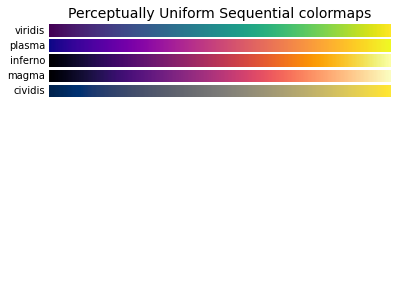

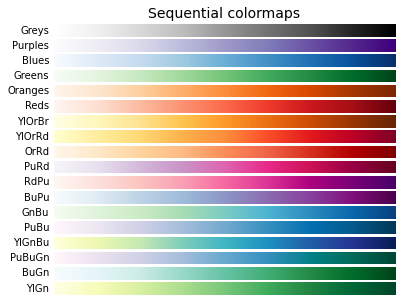

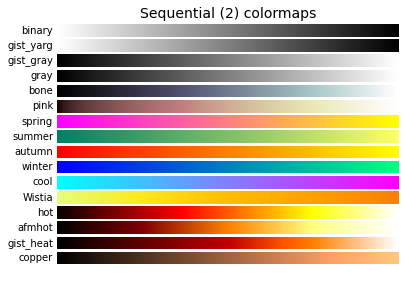

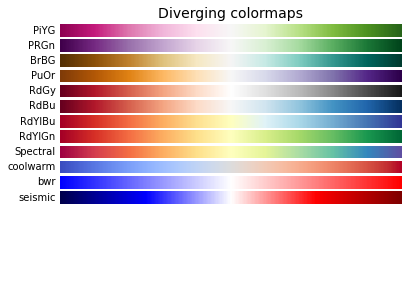

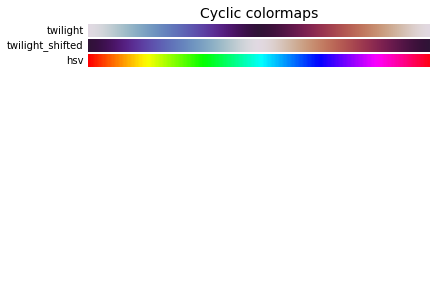

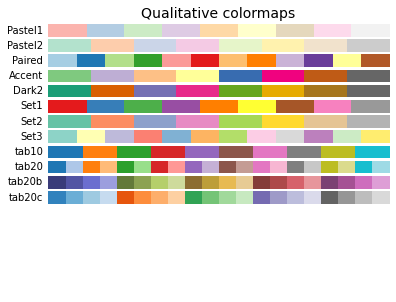

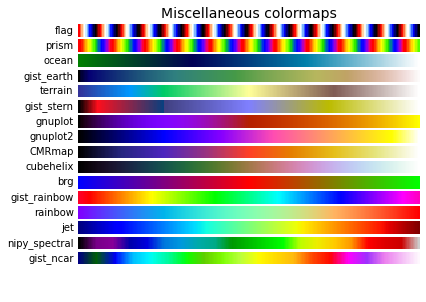

In [4]:
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()